In [1]:
import pickle
import sys

import ray
from matplotlib import pyplot as plt
import numpy as np
import tensorflow as tf
import healpy as hp
import os

import GCE.gce
gce = GCE.gce.Analysis()
gce.load_params("../parameter_files/parameters.py")

2022-11-08 16:18:16.099202: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-08 16:18:16.099250: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-11-08 16:18:28.631311: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


INFO:tensorflow:Using MirroredStrategy with devices ('/job:localhost/replica:0/task:0/device:CPU:0',)
Number of devices: 1
Loading parameters from '../parameter_files/parameters.py'...
Loading parameters: ['Edep' 'comb' 'data' 'gen' 'mod' 'nn' 'plot' 'train' 'tt']


2022-11-08 16:18:28.693666: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcuda.so.1
2022-11-08 16:18:29.015776: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:923] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2022-11-08 16:18:29.036932: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1733] Found device 0 with properties: 
pciBusID: 0000:01:00.0 name: NVIDIA GeForce GTX 1650 computeCapability: 7.5
coreClock: 1.515GHz coreCount: 14 deviceMemorySize: 4.00GiB deviceMemoryBandwidth: 178.84GiB/s
2022-11-08 16:18:29.037104: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-11-08 16:18:29.037241: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic 

In [2]:
ray_settings = {"num_cpus": 4}  # select the number of CPUs here
#gce.generate_template_maps(ray_settings, n_example_plots=5, job_id=0)

#gce.combine_template_maps(save_filenames=True, do_combine=True)

In [3]:
gce.build_pipeline()

2022-11-08 16:19:08.885715: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-11-08 16:19:08.896952: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2496005000 Hz


Input pipeline successfully built.


In [4]:
row=len(gce.p.Edep.keys())-2
col=len(gce.p.data["Ebins"])-1
print(col)

10


In [5]:
samples = gce.datasets["train"].get_samples(200)
data, labels = samples["data"], samples["label"]

Training: End of epoch!
Training: End of epoch!
Training: End of epoch!


Training: End of epoch!
Training: End of epoch!
Training: End of epoch!
Training: End of epoch!
Training: End of epoch!
Training: End of epoch!
Training: End of epoch!
Training: End of epoch!
Training: End of epoch!


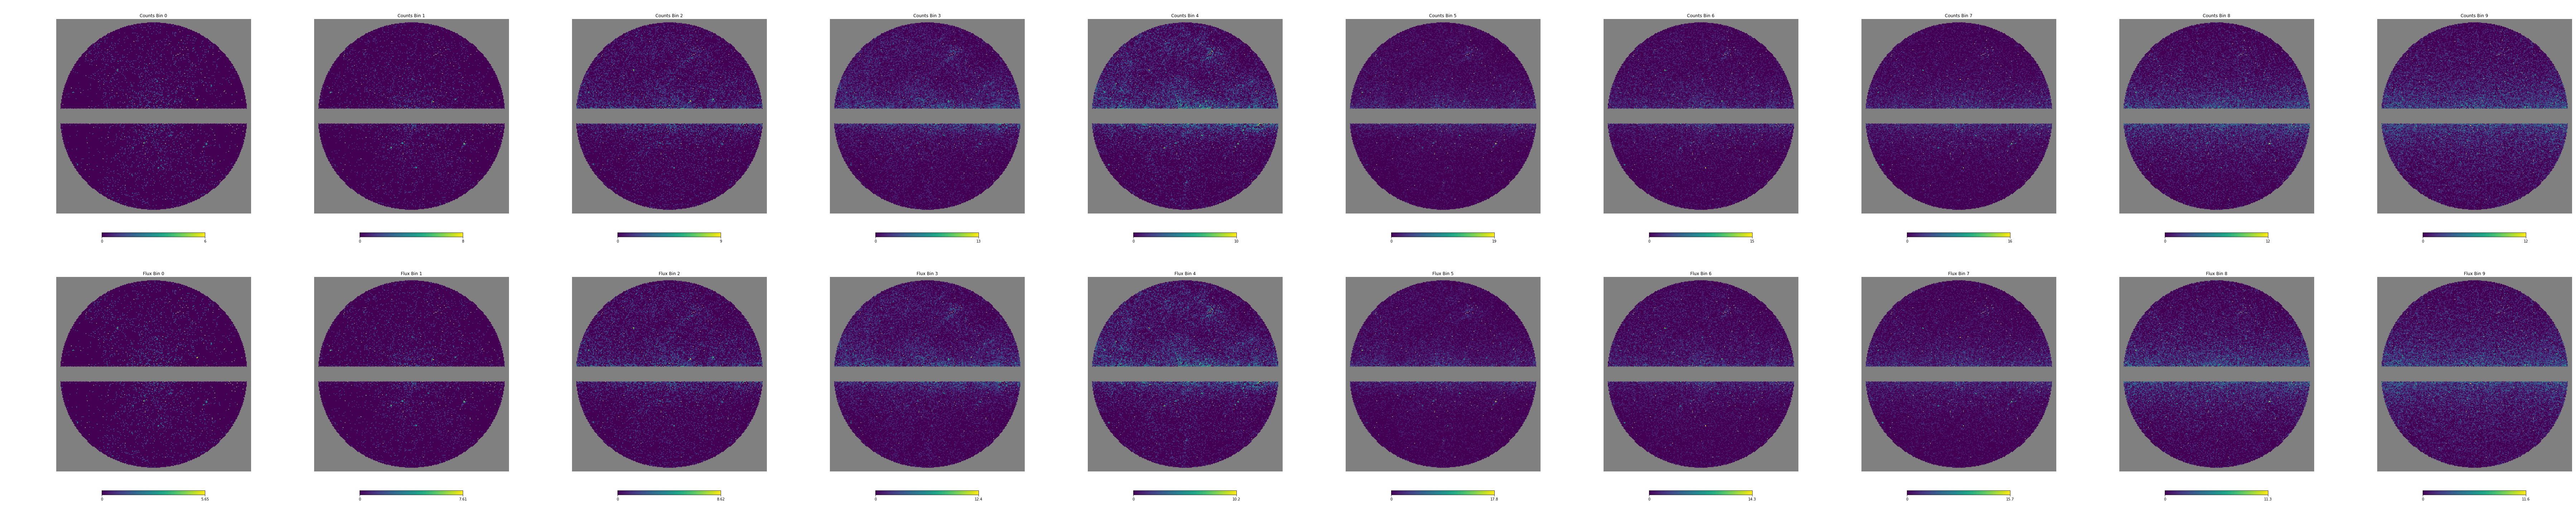

In [6]:
samples = gce.datasets["train"].get_samples(200)
data, labels = samples["data"], samples["label"]
# NOTE: the maps are stored in NEST format
map_to_plot = 0 #index of which map is plotted
r = gce.p.data["outer_rad"] + 1
#insert the params
fig, ax= plt.subplots(2,col,figsize = (100,20))

subplot=1
[axi.set_axis_off() for axi in ax.ravel()]
plt.tight_layout()
for Ebin in range(0,len(gce.p.data["Ebins"])-1):

    hp.cartview(gce.decompress(data[map_to_plot,:,Ebin] * gce.template_dict["rescale_compressed"][:,Ebin], fill_value=np.nan), nest=True,
                 lonra=[-r, r], latra=[-r, r], sub=(2,col,subplot), title='Counts Bin ' + str(Ebin))

    hp.cartview(gce.decompress(data[map_to_plot,:,Ebin], fill_value=np.nan), nest=True,
                 lonra=[-r, r], latra=[-r, r], sub=(2,col,col+subplot), title='Flux Bin ' + str(Ebin))
    subplot+=1

plt.show()

In [7]:
unique,counts=np.unique(gce.decompress(data[map_to_plot,:,0] * gce.template_dict["rescale_compressed"][:,0]),return_counts=True)
print(str(unique[0]) + " " + str(counts[0]))

unique,counts=np.unique(gce.decompress(data[map_to_plot,:,9] * gce.template_dict["rescale_compressed"][:,9]),return_counts=True)
print(str(unique[0]) + " " + str(counts[0]))


0.0 783976
0.0 768470


In [8]:
map_bin_0=gce.decompress(data[map_to_plot,:,0] * gce.template_dict["rescale_compressed"][:,0])
map_bin_0_mask=map_bin_0==0
map_bin_9=gce.decompress(data[map_to_plot,:,9] * gce.template_dict["rescale_compressed"][:,9])
map_bin_9_mask=map_bin_9==0

In [9]:
map_bin_0.shape

(786432,)

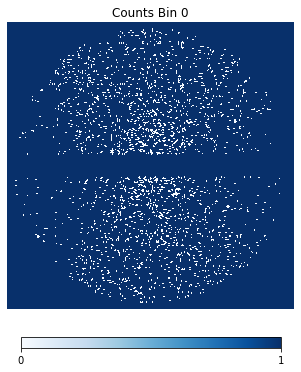

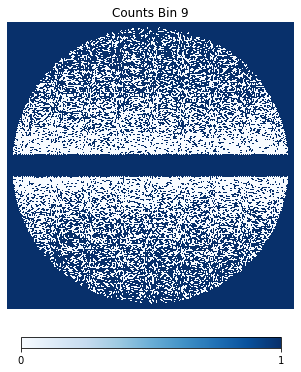

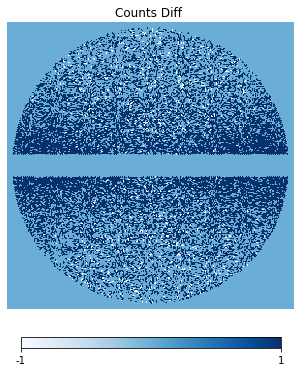

In [10]:
hp.cartview(map_bin_0_mask, nest=True,
                 lonra=[-r, r], latra=[-r, r], title='Counts Bin ' + str(0), cmap="Blues")
plt.show()
hp.cartview(map_bin_9_mask, nest=True,
                 lonra=[-r, r], latra=[-r, r], title='Counts Bin ' + str(9), cmap="Blues")
plt.show()
mask_diff=map_bin_0_mask.astype("int")-map_bin_9_mask.astype("int")

hp.cartview(mask_diff, nest=True,
                 lonra=[-r, r], latra=[-r, r], title='Counts Diff ', cmap="Blues")
plt.show()

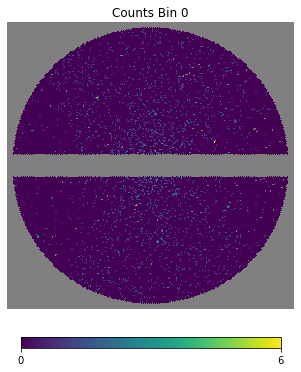

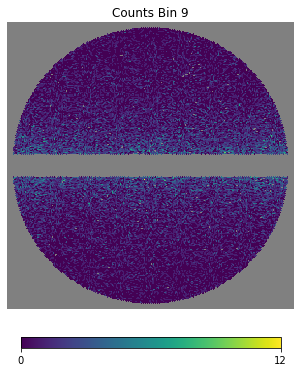

In [11]:
hp.cartview(gce.decompress(data[map_to_plot,:,0] * gce.template_dict["rescale_compressed"][:,0], fill_value=np.nan), nest=True,
                 lonra=[-r, r], latra=[-r, r], title='Counts Bin ' + str(0))
plt.show()
hp.cartview(gce.decompress(data[map_to_plot,:,9] * gce.template_dict["rescale_compressed"][:,9], fill_value=np.nan), nest=True,
                 lonra=[-r, r], latra=[-r, r], title='Counts Bin ' + str(9))
plt.show()

In [12]:
gce.template_dict["rescale_compressed"].shape

(32892, 10)

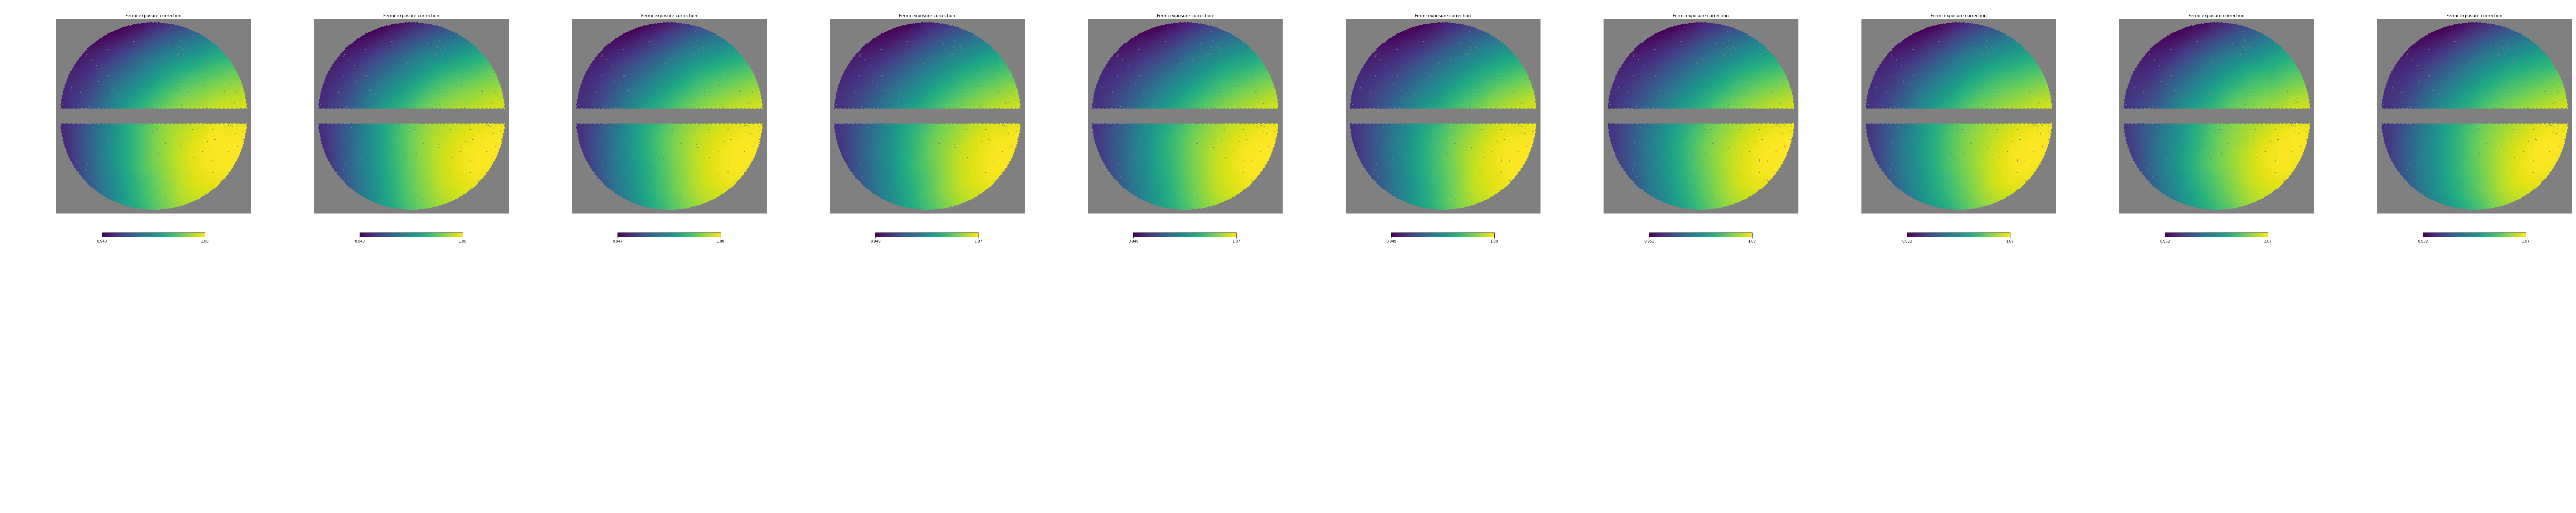

In [13]:
fig, ax= plt.subplots(2,col,figsize = (100,20))

subplot=1
[axi.set_axis_off() for axi in ax.ravel()]
plt.tight_layout()


for Ebin in range(0,len(gce.p.data["Ebins"])-1):
    hp.cartview(gce.decompress(gce.template_dict["rescale_compressed"][:,Ebin], fill_value=np.nan), nest=True,
                title="Fermi exposure correction", lonra=[-r, r], sub=(2,col,subplot), latra=[-r, r])
    subplot+=1

plt.show()

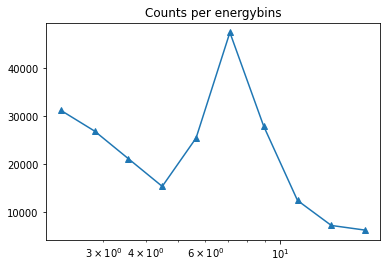

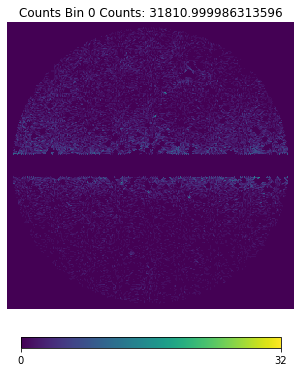

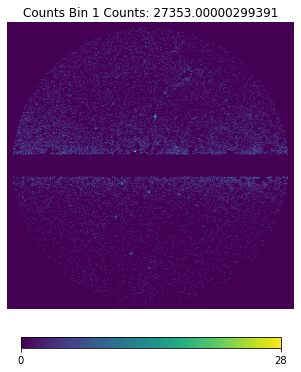

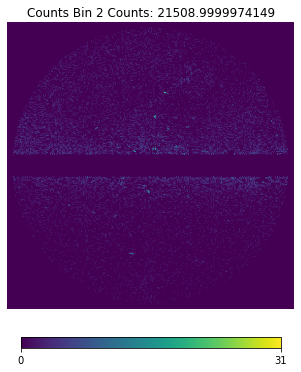

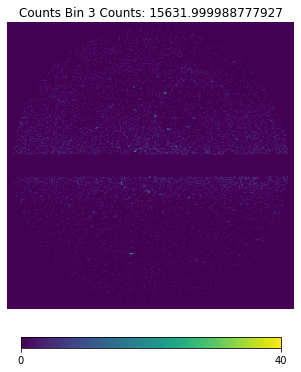

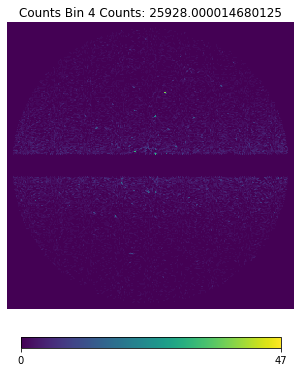

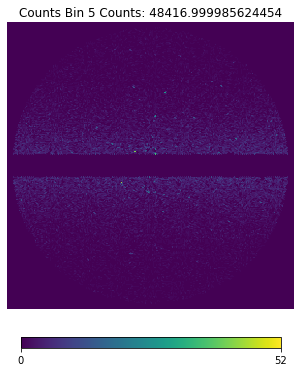

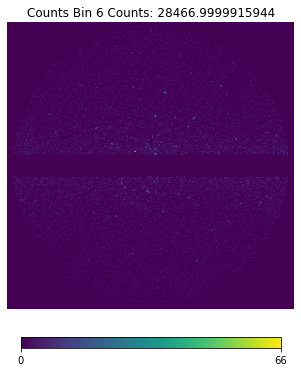

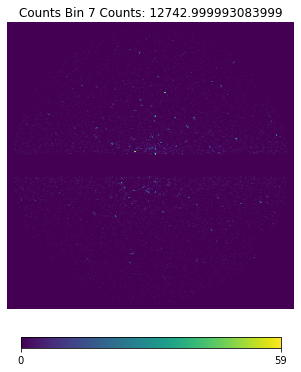

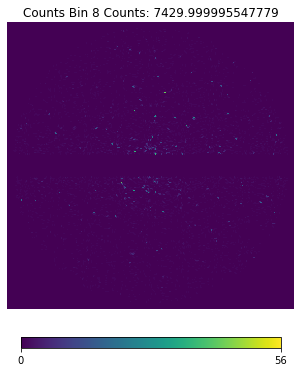

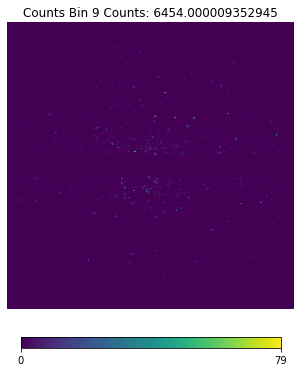

In [14]:
map_to_plot=1
gce.plot_mean_spectra(data[map_to_plot])
plt.show()


for Ebin in range(0,len(gce.p.data["Ebins"])-1):
    maps = gce.decompress(data[map_to_plot,:,Ebin] * gce.template_dict["rescale_compressed"][:,Ebin])
    hp.cartview(maps, nest=True,
                 lonra=[-r, r], latra=[-r, r], cmap= "viridis", title='Counts Bin ' + str(Ebin) + " Counts: " + str(maps.sum()))
    plt.show()

In [15]:
data_counts=data.sum(2).sum(1)
print(np.mean(data_counts))

191494.6


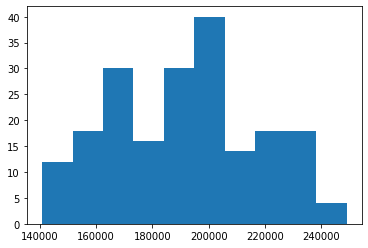

In [16]:
plt.hist(data_counts)
plt.show()

In [17]:
def get_template(fermi_folder, temp):
    """
    Returns a template.
    :param fermi_folder: folder containing the template maps
    :param temp: short name of template
    :return: template
    """
    if temp == "iso":
        t = np.load(os.path.join(fermi_folder, 'template_iso_smooth.npy'))
    elif temp == "dif":
        t = np.load(os.path.join(fermi_folder, 'template_dif.npy'))
    elif temp == "bub":
        t = np.load(os.path.join(fermi_folder, 'template_bub_smooth.npy'))
    elif temp == "bub_var":
        try:
            t = np.load(os.path.join(fermi_folder, 'template_nbub.npy'))
        except FileNotFoundError:
            t = np.load(os.path.join(fermi_folder, 'template_bub_alt.npy'))
    elif temp == "gce":
        try:
            t = np.load(os.path.join(fermi_folder, 'template_gce.npy'))
        except FileNotFoundError:
            t = np.load(os.path.join(fermi_folder, 'template_nfw_g1p0_smooth.npy'))
    elif temp == "gce_12":
        try:
            t = np.load(os.path.join(fermi_folder, 'template_gce_gamma_1.20.npy'))
        except FileNotFoundError:
            t = np.load(os.path.join(fermi_folder, 'template_nfw_g1p2_smooth.npy'))
    elif temp == "gce_12_N":
        t = np.load(os.path.join(fermi_folder, 'template_gce_gamma_1.20_N.npy'))
    elif temp == "gce_12_S":
        t = np.load(os.path.join(fermi_folder, 'template_gce_gamma_1.20_S.npy'))
    elif temp == "gce_12_PS":
        t = np.load(os.path.join(fermi_folder, 'template_nfw_g1p2.npy'))
    elif temp == "disk":
        t = np.load(os.path.join(fermi_folder, 'template_dsk.npy'))
    elif temp == "thin_disk":
        try:
            t = np.load(os.path.join(fermi_folder, 'template_disk_r_s_5_z_s_0.3.npy'))
        except FileNotFoundError:
            t = np.load(os.path.join(fermi_folder, 'template_dsk_z0p3.npy'))
    elif temp == "thin_disk_PS":
        try:
            t = np.load(os.path.join(fermi_folder, 'template_disk_r_s_5_z_s_0.3.npy'))
        except FileNotFoundError:
            t = np.load(os.path.join(fermi_folder, 'template_dsk_z0p3.npy'))
    elif temp == "thick_disk":
        try:
            t = np.load(os.path.join(fermi_folder, 'template_disk_r_s_5_z_s_1.npy'))
        except FileNotFoundError:
            t = np.load(os.path.join(fermi_folder, 'template_dsk_z1p0.npy'))

    elif temp == "dif_O_pibs":
        try:
            t = np.load(os.path.join(fermi_folder, 'ModelO_r25_q1_pibrem.npy'))
        except FileNotFoundError:
            t = np.load(os.path.join(fermi_folder, 'template_Opi.npy'))
    elif temp == "dif_O_ic":
        try:
            t = np.load(os.path.join(fermi_folder, 'ModelO_r25_q1_ics.npy'))
        except FileNotFoundError:
            t = np.load(os.path.join(fermi_folder, 'template_Oic.npy'))
    elif temp == "dif_A_pibs":
        t = np.load(os.path.join(fermi_folder, 'template_Api.npy'))
    elif temp == "dif_A_ic":
        t = np.load(os.path.join(fermi_folder, 'template_Aic.npy'))
    elif temp == "dif_F_pibs":
        t = np.load(os.path.join(fermi_folder, 'template_Fpi.npy'))
    elif temp == "dif_F_ic":
        t = np.load(os.path.join(fermi_folder, 'template_Fic.npy'))
    elif temp == "psc_3":
        try:
            t = np.load(os.path.join(fermi_folder, 'template_psc.npy'))
        except FileNotFoundError:
            t = np.load(os.path.join(fermi_folder, 'template_psc_3fgl.npy'))
    elif temp == "psc_4":
        t = np.load(os.path.join(fermi_folder, 'template_psc_4fgl.npy'))
    elif temp == "3FGL_mask":
        try:
            t = np.load(os.path.join(fermi_folder, 'fermidata_pscmask.npy'))
        except FileNotFoundError:
            t = np.load(os.path.join(fermi_folder, 'fermidata_pscmask_3fgl.npy'))
    elif temp == "4FGL_mask":
        t = np.load(os.path.join(fermi_folder, 'fermidata_pscmask_4fgl.npy'))
    elif temp == "exp":
        t = np.load(os.path.join(fermi_folder, 'fermidata_exposure.npy'))
    elif temp == "counts":
        t = np.load(os.path.join(fermi_folder, "fermidata_counts.npy"))
    elif temp == "fermi_map":
        t = np.load(os.path.join(fermi_folder, "fermidata_counts.npy"))
    else:
        raise NotImplementedError("Template", temp, "not available!")
    return t

In [18]:
fermi_data=get_template("/home/flo/GCE_NN/data/fermi_data_edep/fermi_data_256/", "fermi_map")
#TODO hist vom fermi data
#ffs in ebin

In [19]:
fermi_data.shape


(40, 786432)

In [20]:
mod_names=gce.p.mod["models_P"]+gce.p.mod["models_PS"]
print(mod_names)

['dif_O_pibs', 'dif_O_ic', 'iso', 'bub', 'gce_12_PS', 'thin_disk_PS']


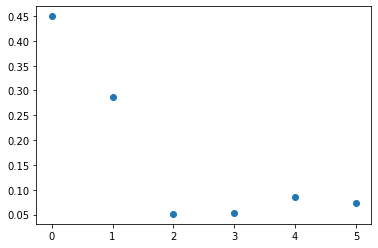

In [23]:
import pickle
data, labels = samples["data"], samples["label"]
dat=open("/home/flo/GCE_NN/data/Combined_maps/Example_comb_256/Train/Maps_0000_train.pickle", "rb")
key_data=pickle.load(dat)

mean_labels=[]
for temp in key_data["flux_fraction"].keys():
    mean_labels.append(key_data["flux_fraction"][temp].mean())

plt.scatter(range(0,6),mean_labels)
plt.show()

In [24]:
labels[0].std()


0.20781986

In [25]:
mean_labels

[0.4495658862310911,
 0.28785610246748994,
 0.05130450557806859,
 0.05377422007134251,
 0.08499716360951928,
 0.07250212204248861]

In [26]:
key_data["flux_fraction"]["gce_12_PS"]

array([[2.01824718e-02, 3.98081523e-02, 7.44658070e-02, 1.23735687e-01,
        2.27825177e-01, 2.75461408e-01, 1.83702157e-01, 6.99424242e-02,
        1.43021540e-02, 1.53279421e-03],
       [2.41995914e-01, 2.09423333e-01, 1.61074341e-01, 1.12331253e-01,
        7.72237019e-02, 5.13370947e-02, 3.71682629e-02, 3.17672719e-02,
        2.63067659e-02, 2.30124335e-02],
       [2.65075826e-02, 2.31025518e-02, 1.97244738e-02, 1.78501861e-02,
        1.39998687e-02, 1.12483632e-02, 7.91624661e-03, 6.31059617e-03,
        5.17084656e-03, 5.21151434e-03],
       [7.26412858e-03, 1.13197434e-02, 1.59661582e-02, 2.22450503e-02,
        2.97748692e-02, 5.47177112e-02, 8.82194839e-02, 7.60640546e-02,
        1.27639452e-02, 6.12449137e-03],
       [2.90593076e-02, 8.12980528e-02, 8.94430463e-02, 9.93810294e-02,
        1.03311880e-01, 8.87387306e-02, 1.37531850e-01, 1.33493293e-02,
        5.93395676e-02, 2.63180863e-01],
       [6.02546929e-02, 4.85261628e-02, 3.15844188e-02, 4.02914251e-02,
   